
# <p><center style="background-color:#f89fff;font-family:Gabriola;color:#662200;font-size:210%;text-align:center;border-radius:10px 70px;">   Credit Card Fraud Detection 📰 </center></p>

# 🎈 About The DataSet

#### Context
- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [1]:
#Importing the basic librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot


### The Mission 🎯 :
- 1️⃣ Make the Analysis
- 2️⃣ Make ML- Model - Classification - Before Feature Selection
- 3️⃣ Make ML- Model - Classification - After Feature Selection

In [2]:
#Importing the dataset

df=pd.read_csv('creditcard.csv')

# look the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<a id="2"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#666600;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1️⃣ Explore the Data and Make Preprocess </p>

In [3]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# check the missing value - Null 
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- - 📄 No any missing data / missing value 

In [5]:
# let show the describe the numeric feature 
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
#check if there any duplication 
df.duplicated().sum()

1081

- 📄 We have Duplicated values/ we need delete this values 

In [7]:
# Drop duplicates based on a subset of columns
df.drop_duplicates(inplace=True)


In [8]:
# the shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 283726 Rows and 31 columns


<a id="2"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#666600;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2️⃣ Explore Data using some Visuals </p>

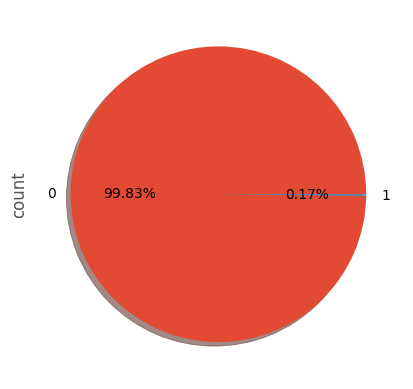

In [9]:
# how many cases fraud in the dataset

df["Class"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

- 0 = Not Fraud 99.8%
- 1 = Fraud  0.17%

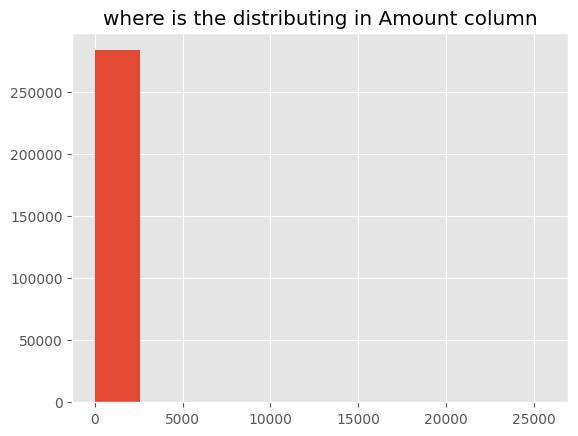

In [10]:
# using histogram, to show the Amount columns where is the distributing

plt.hist (data= df, x="Amount")
plt.title("where is the distributing in Amount column")
plt.show()

In [11]:
#show the first 10 values / amount the highest 
df["Amount"].sort_values(ascending=False).head(10)

274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
169457    11789.84
284249    10199.44
227921    10000.00
74699      8790.26
245474     8787.00
Name: Amount, dtype: float64

<a id="3"></a>
# <p style="padding:10px;background-color:#d896ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3️⃣ Building a Machine Learning Model || Classification - Before Feature Selection</p>

In [12]:
#Importing the basic librarires for building model  / Classification 
from sklearn.model_selection import train_test_split

from sklearn.metrics import  classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import UndefinedMetricWarning
import warnings

In [13]:
#Defined X value and y value , and split the data train

X = df.drop(columns="Class")           
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 30)
X Test  :  (70932, 30)
Y Train :  (212794,)
Y Test  :  (70932,)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Defined object from library Classification  / from the libraries import before / 6 model

LR = LogisticRegression(max_iter=1000)
DTR = DecisionTreeClassifier()
SVC = SVC()


In [15]:
# make for loop for classification 

LR_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

models = [LR_pipeline,DTR,SVC]

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__ + ":")
    print(classification_report(y_test, y_pred, zero_division='warn'))  # Setting zero_division to 'warn'
    print("********************************************")

Pipeline:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.88      0.54      0.67       112

    accuracy                           1.00     70932
   macro avg       0.94      0.77      0.83     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.69      0.75      0.72       112

    accuracy                           1.00     70932
   macro avg       0.84      0.87      0.86     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.00      0.00      0.00       112

    accuracy                           1.00     70932

<a id="3"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">4️⃣ Building a Machine Learning Model || Classification - Before Feature Selection</p>

In [16]:
# import model Feature selection for choice number of columns depends on the correlation between the values and the output

from sklearn.feature_selection import SelectPercentile

In [17]:
# we need choice 50 % of the feature

F_50 = SelectPercentile( percentile= 50)

In [18]:
#make the transform

set_X = F_50.fit_transform(X,y)

In [19]:
#now choice 50% of the original data and put in the new DataFrame and put the same header name from the original data

new_x =pd.DataFrame(set_X,columns= [ i for i,j in zip (X.columns, F_50.get_support()) if j == True ])
new_x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981


- This columns we need after the python choice 

In [20]:
# y columns , it`s the same columns - calss
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [21]:
# split the new data 

X = new_x      
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 15)
X Test  :  (70932, 15)
Y Train :  (212794,)
Y Test  :  (70932,)


In [22]:
# make for loop for classification 

li = [LR,DTR,SVC]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

LogisticRegression(max_iter=1000) :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.86      0.51      0.64       112

    accuracy                           1.00     70932
   macro avg       0.93      0.75      0.82     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.73      0.67      0.70       112

    accuracy                           1.00     70932
   macro avg       0.86      0.83      0.85     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
